In [338]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from joblib import dump
import seaborn as sns

In [339]:
df = pd.read_csv('HR_comma_sep.csv', delimiter=',')
df.columns = df.columns.str.lower()
df.rename(columns = {'average_montly_hours':'average_monthly_hours'}, inplace= True)
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [340]:
# df.duplicated().sum()
# df.drop_duplicates(inplace = True)
df

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [341]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [342]:
#I am going to create some dummy variables for the categoric variables.

dummies_1 = pd.get_dummies(df.department, dtype = int)
dummies_1


,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
14994,0,0,0,0,0,0,0,0,1,0
14995,0,0,0,0,0,0,0,0,1,0
14996,0,0,0,0,0,0,0,0,1,0
14997,0,0,0,0,0,0,0,0,1,0


In [343]:
merged_1 = pd.concat([df, dummies_1], axis = 'columns')
merged_1 = merged_1.drop(['department'], axis = 'columns')
merged_1

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,left,promotion_last_5years,salary,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical
0,0.38,0.53,2,157,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
2,0.11,0.88,7,272,4,0,1,0,medium,0,0,0,0,0,0,0,1,0,0
3,0.72,0.87,5,223,5,0,1,0,low,0,0,0,0,0,0,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,low,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,low,0,0,0,0,0,0,0,0,1,0
14995,0.37,0.48,2,160,3,0,1,0,low,0,0,0,0,0,0,0,0,1,0
14996,0.37,0.53,2,143,3,0,1,0,low,0,0,0,0,0,0,0,0,1,0
14997,0.11,0.96,6,280,4,0,1,0,low,0,0,0,0,0,0,0,0,1,0


In [344]:
dummies_2 = pd.get_dummies(df.salary, dtype = int)

merged_2 = pd.concat([merged_1, dummies_2], axis = 'columns')
merged_2 = merged_2.drop(['salary'], axis = 'columns')

merged_2.groupby('left').mean()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,time_spend_company,work_accident,promotion_last_5years,IT,RandD,accounting,hr,management,marketing,product_mng,sales,support,technical,high,low,medium
left,,,,,,,,,,,,,,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251,0.083479,0.058278,0.049265,0.045852,0.047165,0.057315,0.061603,0.273539,0.146482,0.177021,0.101068,0.450123,0.448810
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321,0.076449,0.033884,0.057127,0.060207,0.025483,0.056847,0.055447,0.283954,0.155419,0.195183,0.022963,0.608233,0.368804


<Axes: >

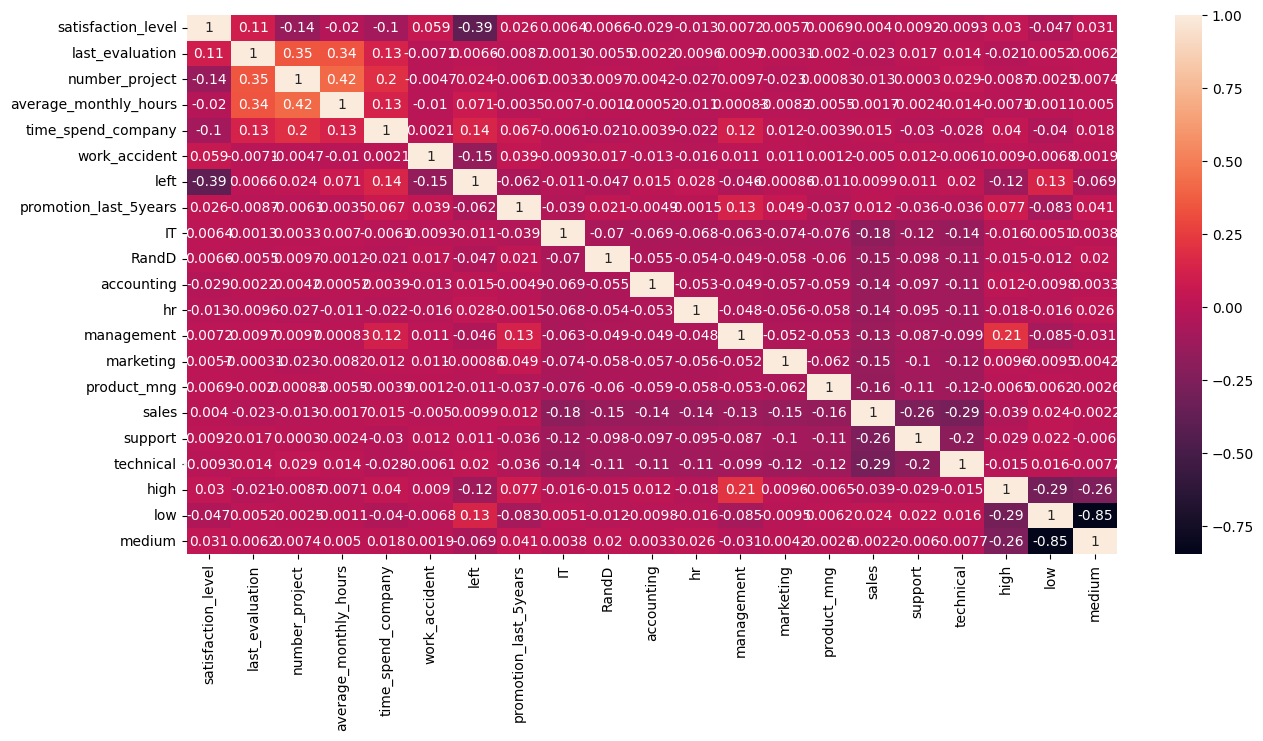

In [345]:
corr = merged_2.corr()
plt.figure(figsize = (15,7))
sns.heatmap(corr, annot = True)
# From the heatmap I can decide which features impact retetion the most. I see that there is a big correlation between satisfaction
# level and retention. There are a few others with a higher correlation: average_mothly_hours, time_spend_company, work_accident,
# and low, promotion last5 years and medium, high. The correlation `with pretty much any other feature is very small.

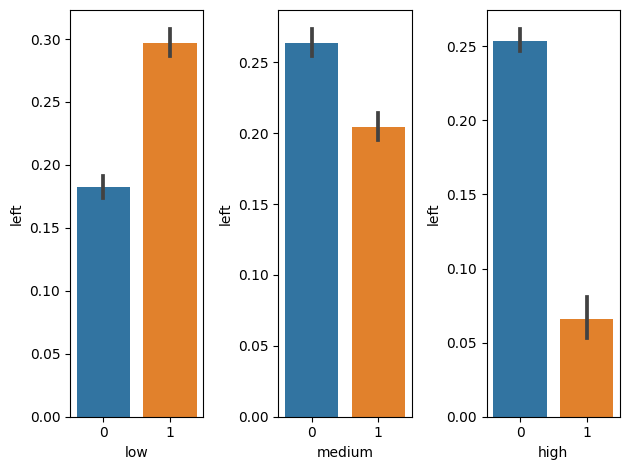

In [346]:
# Plot bar charts showing impact of employee salaries on retention
fig, axs = plt.subplots(ncols = 3)
sns.barplot(data = merged_2, x = 'low', y = 'left', ax = axs[0])
sns.barplot(data = merged_2, x= 'medium', y = 'left', ax = axs[1])
sns.barplot(data = merged_2, x = 'high', y = 'left', ax=axs[2])
plt.tight_layout()

#Graph data seems to indicate that having a lower salary makes people leave the company.

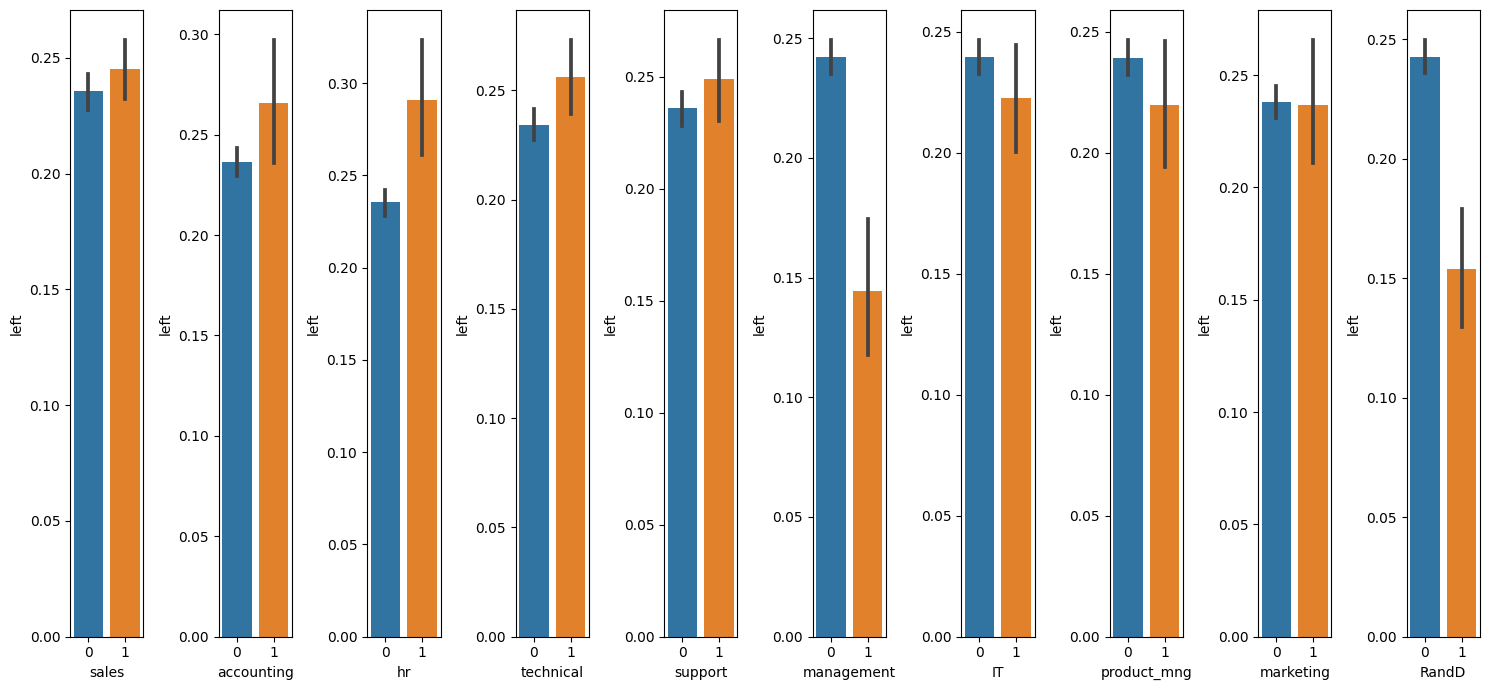

In [347]:
departments = df.department.unique()
fig , axs = plt.subplots(ncols = 10, figsize = (15,7))


for i,department in enumerate(departments):
    sns.barplot(data = merged_2, x = department , y = 'left', ax = axs[i])

plt.tight_layout()
plt.show()



# There doesn't seem to be a huge imbalance between people that leave and people who don't regarding which department they are from. 

In [348]:
# I will filter out the variables which do not change the probability of the person leaving. Will also drop the redudant columns
# from the dummies.
# From the heatmap I can decide which features impact retetion the most. I see that there is a big correlation between satisfaction
# level and retention. There are a few others with a higher correlation: average_mothly_hours, time_spend_company, work_accident,
# and low, promotion last5 years and medium, high. The correlation with pretty much any other feature is very small.


# In this version 1 I will add the less correlated features and see how it impacts performance
final_df_v1 = merged_2[['satisfaction_level', 'average_monthly_hours', 'time_spend_company','work_accident','promotion_last_5years', 'low', 'medium', 'left']]
# In this version 2 I will remove less corelated features and see how it impacts performance
final_df_v2 = merged_2[['satisfaction_level', 'time_spend_company','work_accident','low', 'medium', 'left']]

In [349]:
X = final_df_v2.drop(['left'], axis = 'columns')
y = final_df_v2.left
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
#Generate train, test split for data


In [350]:
#Initialize and train the model
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [351]:
X_1 = final_df_v1.drop(['left'], axis = 'columns')
y_1 = final_df_v1.left
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size= 0.2)

In [352]:
lr_1 = LogisticRegression(max_iter= 10000)
lr_1.fit(X_train_1, y_train_1)

LogisticRegression(max_iter=10000)

In [353]:
lr.score(X_test, y_test)

0.773

In [354]:
lr_1.score(X_test_1, y_test_1)

0.772

In [355]:
# The accuracy of both models changes if I run the code again but it is never the same with the highest accuracy, so they are pretty
# much the same in terms of accuracy.